Simulating 50 transitions starting from Stop 3...
Simulation complete.
Path taken: [3, 3, 4, 3, 4, 3, 3, 2, 1, 2, 4, 4, 3, 3, 3, 4, 1, 2, 1, 3, 2, 4, 2, 4, 4, 2, 1, 3, 3, 3, 4, 1, 3, 4, 4, 4, 2, 1, 3, 3, 4, 2, 4, 2, 1, 3, 2, 1, 2, 4, 2]

Generating transition graph...


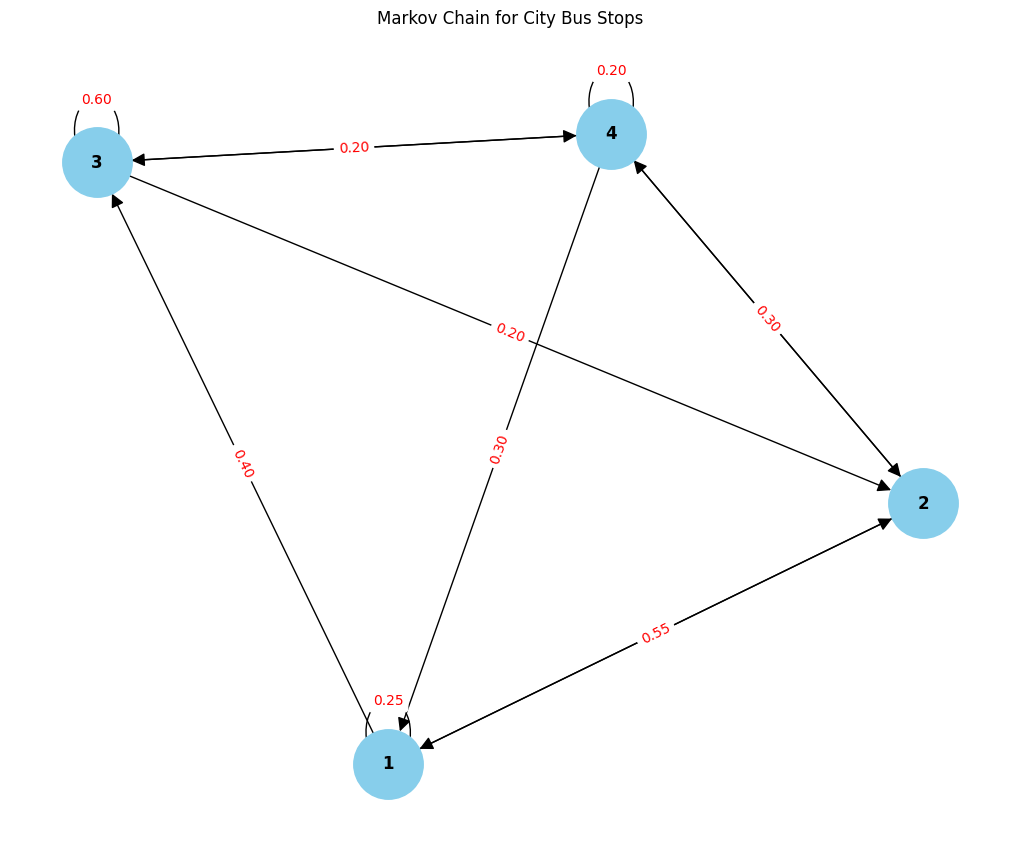

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

T = np.array([
    [0.25, 0.35, 0.40, 0.00],  # From Stop 1
    [0.55, 0.00, 0.00, 0.45],  # From Stop 2
    [0.00, 0.20, 0.60, 0.20],  # From Stop 3
    [0.30, 0.30, 0.20, 0.20]   # From Stop 4
])

states = [1, 2, 3, 4]

state_map = {state: i for i, state in enumerate(states)}

num_transitions = 50
initial_state = 3

current_state_idx = state_map[initial_state]
state_path = [initial_state] # Record the path of states

print(f"Simulating {num_transitions} transitions starting from Stop {initial_state}...")

for _ in range(num_transitions):
    p_dist = T[current_state_idx]

    # np.arange(len(states)) gives [0, 1, 2, 3]
    next_state_idx = np.random.choice(np.arange(len(states)), p=p_dist)

    # Update the current state
    current_state_idx = next_state_idx

    # 3. Record the state at each step
    state_path.append(states[current_state_idx])

print("Simulation complete.")
print("Path taken:", state_path)

G = nx.MultiDiGraph() # Use a directed graph to show one-way transitions

# Add nodes
for state in states:
    G.add_node(state)

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        prob = T[i, j]
        if prob > 0:  # Only draw an edge if there's a non-zero chance of transition
            G.add_edge(origin_state, destination_state, weight=prob, label=f"{prob:.2f}")

print("\nGenerating transition graph...")

# Plotting the graph
pos = nx.spring_layout(G, seed=42) # Positions for all nodes
edge_labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2500, font_size=12, font_weight='bold', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Markov Chain for City Bus Stops")
plt.show()